In [1]:
import os
import geopandas as gpd
import contextily
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_dir = os.path.join(os.getcwd(), "..", "..", "preprocessing", "house_sales_in_king_country", "data")

In [3]:
hskc_df = pd.read_parquet(os.path.join(data_dir, "house_sales_king_country.parquet"))

In [4]:
gdf = gpd.GeoDataFrame(
    hskc_df.drop(["lat", "long"], axis=1),
    geometry=gpd.points_from_xy(x=hskc_df["long"], y=hskc_df["lat"]),
    crs="EPSG:4326",
)

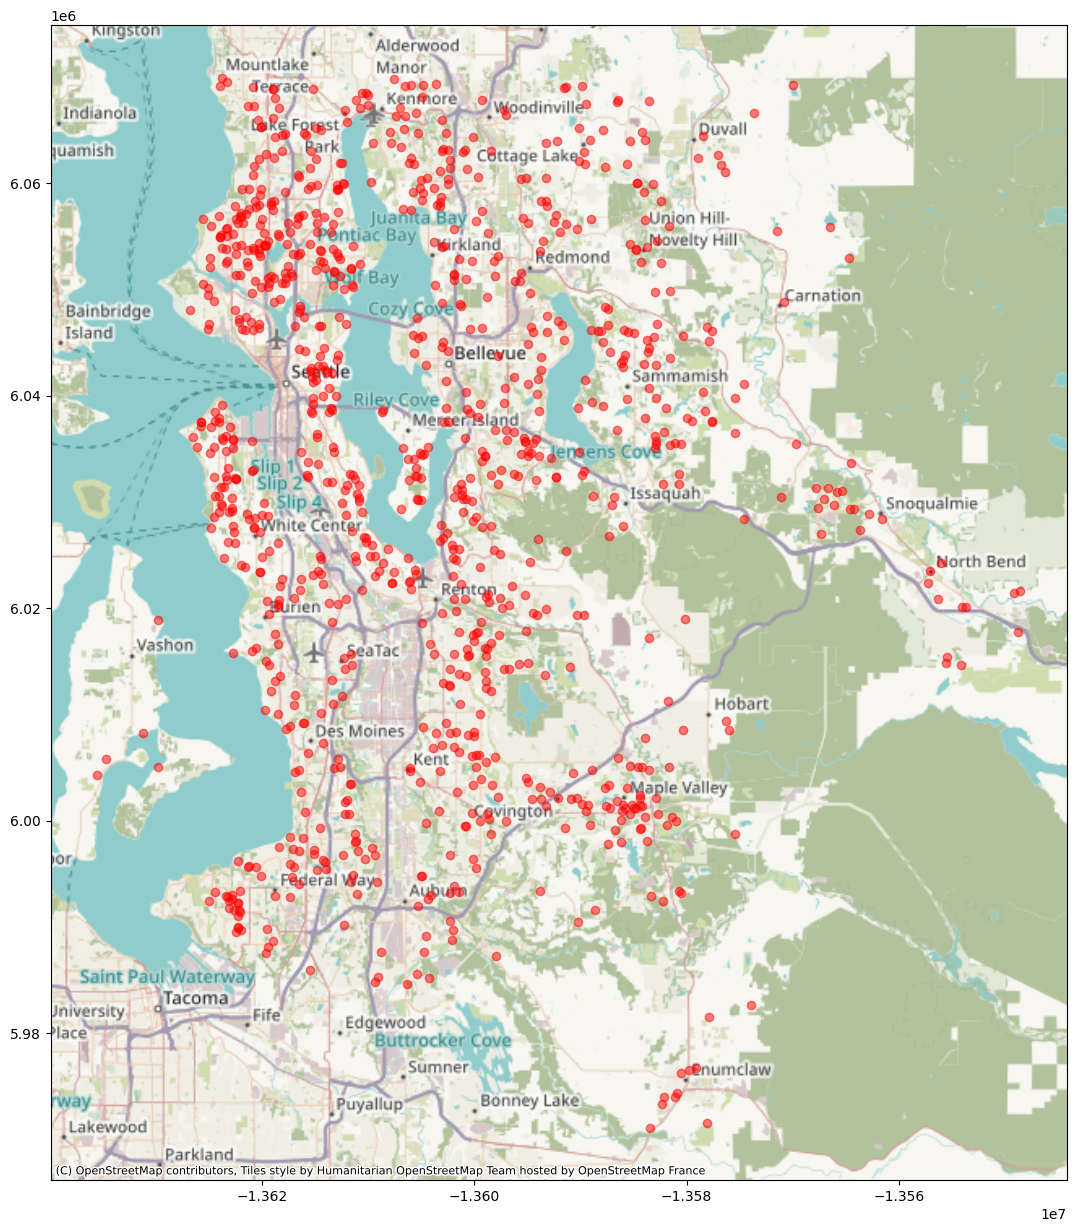

In [5]:
neigh_wm = gdf.iloc[:1000].to_crs(epsg=3857)  # Change crs to web mercator
ax = neigh_wm.plot(figsize=(20, 15), alpha=0.5, color="r")
contextily.add_basemap(ax)
plt.show()